# SPACEc: Distance Permutation Analysis

In [1]:
import spacec as sp

#import standard packages
import os
import pandas as pd
import scanpy as sc

# silencing warnings
import warnings
warnings.filterwarnings('ignore')

/opt/anaconda3/envs/spacec/lib/python3.10/site-packages/louvain/__init__.py:54: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import get_distribution, DistributionNotFound


In [2]:
# set plotting parameters
sc.settings.set_figure_params(dpi=80, facecolor='white')

In [3]:
root_path = "/Users/arcz/Desktop/research/allo immunity/OLT-alloimmunity/" 
data_path = '/Users/arcz/Desktop/research/allo immunity/example_data/raw/'


output_dir = "/Users/arcz/Desktop/research/allo immunity/OLT-alloimmunity/space/saves/"
os.makedirs(output_dir, exist_ok=True)

In [4]:
# Load data
adata = sc.read(output_dir + "adata_nn_demo_annotated_cn.h5ad")
adata

AnnData object with n_obs × n_vars = 48342 × 58
    obs: 'DAPI', 'x', 'y', 'area', 'region_num', 'unique_region', 'condition', 'leiden_1', 'leiden_1_subcluster', 'cell_type_coarse', 'cell_type_coarse_subcluster', 'cell_type_coarse_f', 'cell_type_coarse_f_subcluster', 'cell_type', 'CN_k20_n20', 'CN_k20_n6', 'CN_k20_n6_annot'
    uns: 'CN_k20_n6_colors', 'Centroid_k20_n20', 'Centroid_k20_n6', 'cell_type_coarse_f_subcluster', 'cell_type_coarse_subcluster', 'cell_type_colors', 'dendrogram_leiden_1', 'leiden_1', 'leiden_1_colors', 'leiden_1_subcluster', 'neighbors', 'pca', 'umap', 'unique_region_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'scaled'
    obsp: 'connectivities', 'distances'

## Identify potential interactions

In [5]:
# compute the potential interactions
distance_pvals, results_dict = sp.tl.identify_interactions(
    adata = adata, # AnnData object
    cellid = "index", # column that contains the cell id (set index if the cell id is the index of the dataframe)
    x_pos = "x", # x coordinate column
    y_pos = "y", # y coordinate column
    cell_type = "cell_type", # column that contains the cell type information
    region = "unique_region", # column that contains the region information
    num_iterations=1000, # number of iterations for the permutation test
    num_cores=12,  # number of CPU threads to use
    min_observed = 10, # minimum number of observed interactions to consider a cell type pair
    comparison = 'condition', # column that contains the condition information we want to compare
    distance_threshold=20/0.5085) # distance threshold in px (20 µm)


index is not in the adata.obs, use index as cellid instead!
Computing for observed distances between cell types!
This function expects integer values for xy coordinates.
x and y will be changed to integer. Please check the generated output!


/opt/anaconda3/envs/spacec/lib/python3.10/site-packages/louvain/__init__.py:54: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import get_distribution, DistributionNotFound
/opt/anaconda3/envs/spacec/lib/python3.10/site-packages/louvain/__init__.py:54: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import get_distribution, DistributionNotFound


Save triangulation distances output to anndata.uns triDist
Permuting data labels to obtain the randomly distributed distances!
this step can take awhile


/opt/anaconda3/envs/spacec/lib/python3.10/site-packages/louvain/__init__.py:54: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import get_distribution, DistributionNotFound
/opt/anaconda3/envs/spacec/lib/python3.10/site-packages/louvain/__init__.py:54: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import get_distribution, DistributionNotFound


In [6]:
# the results_dict contains the results of the permutation test as well as the observed and shuffled distances
results_dict.keys()

dict_keys(['distance_pvals', 'triangulation_distances_observed', 'triangulation_distances_iterated'])

In [7]:
# the distance_pvals contains the p-values for each cell type pair and is automatically added to the adata.uns
adata.uns['triDist']

,unique_region,celltype1_index,celltype1,celltype1_X,celltype1_Y,celltype2_index,celltype2,celltype2_X,celltype2_Y,distance,condition
0,reg001,0,M2 Macrophage,1487,162,1,M2 Macrophage,1587,163,100.005000,tonsil
1,reg001,0,M2 Macrophage,1487,162,2,M2 Macrophage,1463,163,24.020824,tonsil
2,reg001,0,M2 Macrophage,1487,162,4,M2 Macrophage,1519,165,32.140317,tonsil
3,reg001,0,M2 Macrophage,1487,162,5,M2 Macrophage,1545,165,58.077534,tonsil
4,reg001,0,M2 Macrophage,1487,162,14,M2 Macrophage,1480,169,9.899495,tonsil
...,...,...,...,...,...,...,...,...,...,...,...
128983,reg002,22485,Vessel,1349,2523,22482,CD8+ T cell,1333,2523,16.000000,tonsillitis
128984,reg002,22486,CD8+ T cell,1420,2525,22482,CD8+ T cell,1333,2523,87.022985,tonsillitis
128985,reg002,22486,CD8+ T cell,1420,2525,22483,CD8+ T cell,1384,2523,36.055513,tonsillitis
128986,reg002,22486,CD8+ T cell,1420,2525,22484,CD4+ T cell,1438,2522,18.248288,tonsillitis


In [8]:
# save adata
adata.write(output_dir + "adata_nn_demo_annotated_cn.h5ad")

## Filter for most significant results

In this example the results are filtered twice. First to remove rare cell types from the analysis because they are overrepresented when comparing distances, and then we filter on statistical significance as well as absolute log fold change.

In [9]:
distance_pvals_filt = sp.tl.remove_rare_cell_types(adata, 
                       distance_pvals, 
                       cell_type_column="cell_type", 
                       min_cell_type_percentage=1)

Cell types that belong to less than 1% of total cells:
['Mast cell', 'NK cell']
Categories (14, object): ['B cell', 'CD4+ T cell', 'CD8+ T cell', 'DC', ..., 'Plasma cell', 'Treg', 'Vessel', 'cDC1']


In [10]:
# Identify significant cell-cell interactions
# dist_table_filt is a simplified table used for plotting
# dist_data_filt contains the filtered raw data with more information about the pairs
#  The function outputs two dataframes:  and dist_data_filt that contains all filtered interactions and  dist_table_filt that contains a table for all interactions that show a significant value in both tissues
dist_table_filt, dist_data_filt = sp.tl.filter_interactions(
    distance_pvals = distance_pvals_filt,
    pvalue = 0.05,
    logfold_group_abs = 0.1,
    comparison = 'condition')

print(dist_table_filt.shape)
dist_data_filt

(41, 2)


,celltype1,celltype2,condition,expected,expected_mean,keep_x,observed,observed_mean,keep_y,pvalue,logfold_group,interaction,logfold_group_abs,pairs
4,B cell,CD8+ T cell,tonsil,"[17.278629734463827, 17.64388303482544, 17.771...",17.657120,True,"[16.1245154965971, 17.008597276909914, 20.8806...",18.313508,True,5.975971e-01,0.052658,B cell --> CD8+ T cell,0.052658,B cell_CD8+ T cell
5,B cell,CD8+ T cell,tonsillitis,"[18.078059477002668, 16.84807679674007, 16.864...",17.211899,True,"[11.41835794972448, 20.390848226826844, 23.117...",18.725151,True,9.191915e-04,0.121571,B cell --> CD8+ T cell,0.121571,B cell_CD8+ T cell
12,B cell,M1 Macrophage,tonsil,"[17.402494482755007, 17.31109471456272, 17.501...",17.697518,True,"[14.212670403551895, 23.853720883753127, 19.23...",16.435238,True,8.936318e-66,-0.106755,B cell --> M1 Macrophage,0.106755,B cell_M1 Macrophage
13,B cell,M1 Macrophage,tonsillitis,"[17.190235177075355, 16.740403561851906, 16.37...",17.310368,True,"[13.92838827718412, 18.973665961010276, 13.453...",15.701913,True,1.516605e-45,-0.140696,B cell --> M1 Macrophage,0.140696,B cell_M1 Macrophage
32,CD4+ T cell,CD8+ T cell,tonsil,"[17.27060708297758, 17.68727382559349, 17.4577...",17.675870,True,"[21.33809277910666, 19.857260779249685, 18.484...",18.160477,True,3.471515e-01,0.039021,CD4+ T cell --> CD8+ T cell,0.039021,CD4+ T cell_CD8+ T cell
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349,Vessel,M1 Macrophage,tonsillitis,"[16.114608759732295, 16.354240260479, 17.67361...",17.267976,True,"[12.529964086141668, 20.591260281974, 12.52996...",16.783939,True,7.720617e-03,-0.041018,Vessel --> M1 Macrophage,0.041018,Vessel_M1 Macrophage
370,cDC1,DC,tonsil,"[17.35661177251431, 17.13776182964606, 17.4948...",17.601280,True,"[15.033296378372908, 16.55294535724685, 15.524...",18.171710,True,6.195398e-02,0.046014,cDC1 --> DC,0.046014,cDC1_DC
371,cDC1,DC,tonsillitis,"[16.216162702107795, 16.784293145368213, 16.26...",17.230044,True,"[16.688759842701145, 14.035668847618199, 14.31...",15.640104,True,2.276335e-07,-0.139676,cDC1 --> DC,0.139676,cDC1_DC
376,cDC1,M1 Macrophage,tonsil,"[18.077429357255763, 16.87789260366065, 16.939...",17.719250,True,"[16.401219466856727, 14.043621071399668, 15.11...",16.109445,True,1.063986e-15,-0.137411,cDC1 --> M1 Macrophage,0.137411,cDC1_M1 Macrophage


## Visualization

condition                    tonsil  tonsillitis  abs_dist
pairs                                                     
CD8+ T cell_DC             0.153049    -0.193012  0.346060
CD8+ T cell_M1 Macrophage  0.133632    -0.198937  0.332569
DC_CD8+ T cell             0.117781    -0.171364  0.289144
GCB_Vessel                -0.043020     0.195143  0.238162
cDC1_DC                    0.046014    -0.139676  0.185690


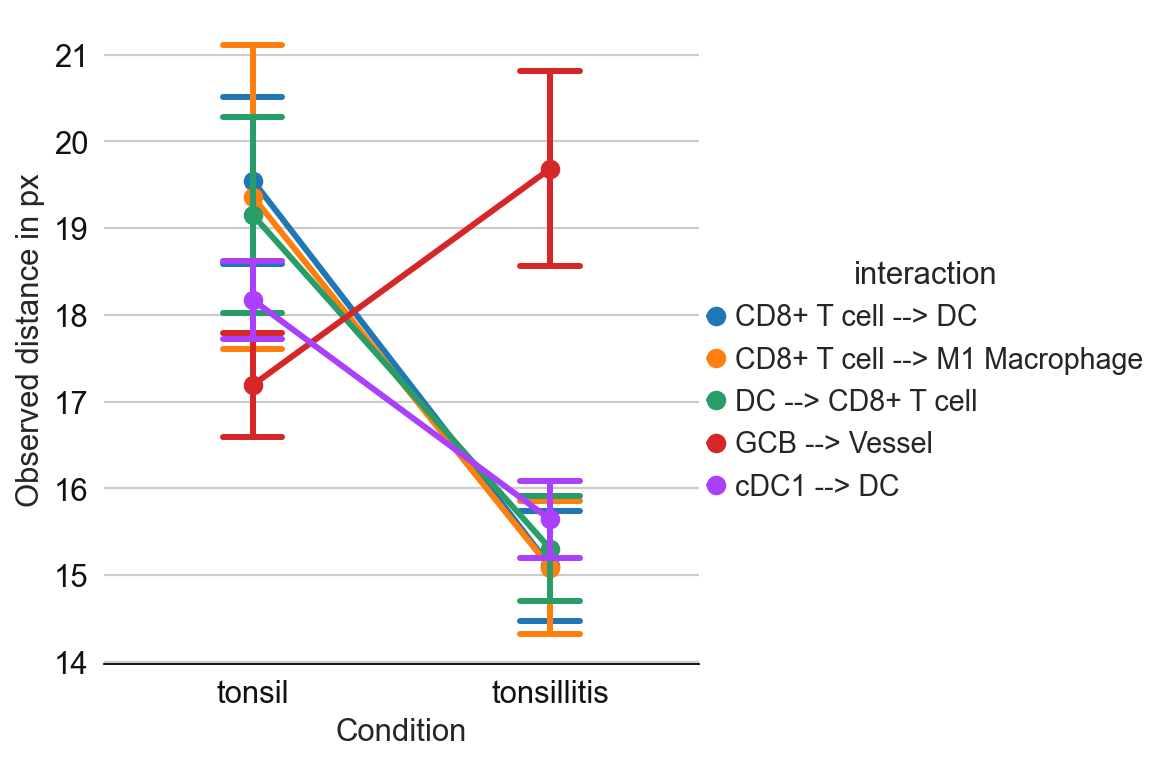

In [11]:
sp.pl.plot_top_n_distances(
    dist_table_filt,
    dist_data_filt,
    n=5,
    colors=None,
    dodge=False,
    savefig=False,
    output_fname="",
    output_dir="./",
    figsize=(5, 5),
    unit="px",
    errorbars=True,
)

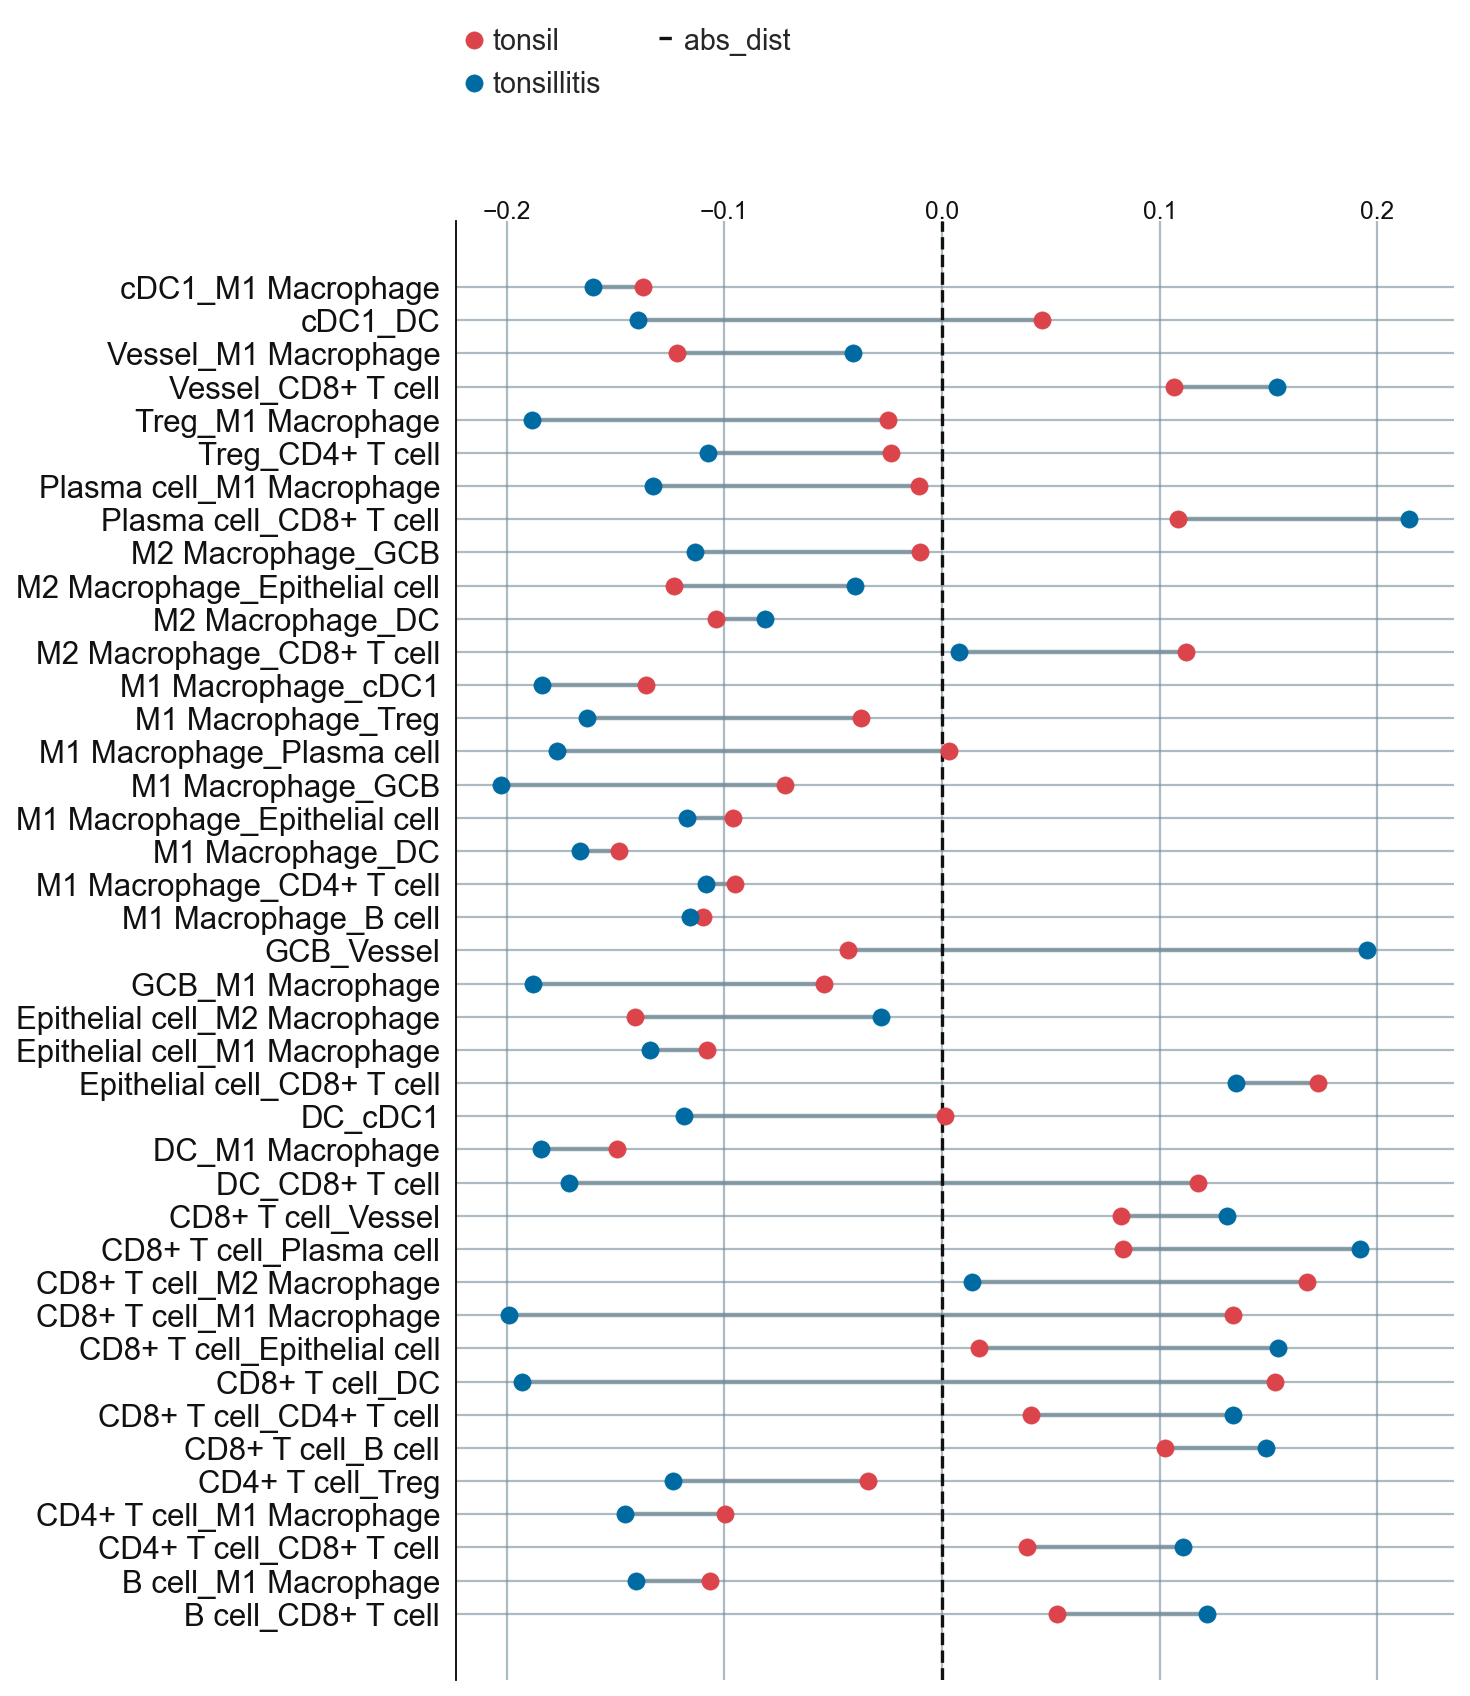

In [12]:
sp.pl.dumbbell(data = dist_table_filt, figsize=(8,12), colors = ['#DB444B', '#006BA2'])

(86, 13)


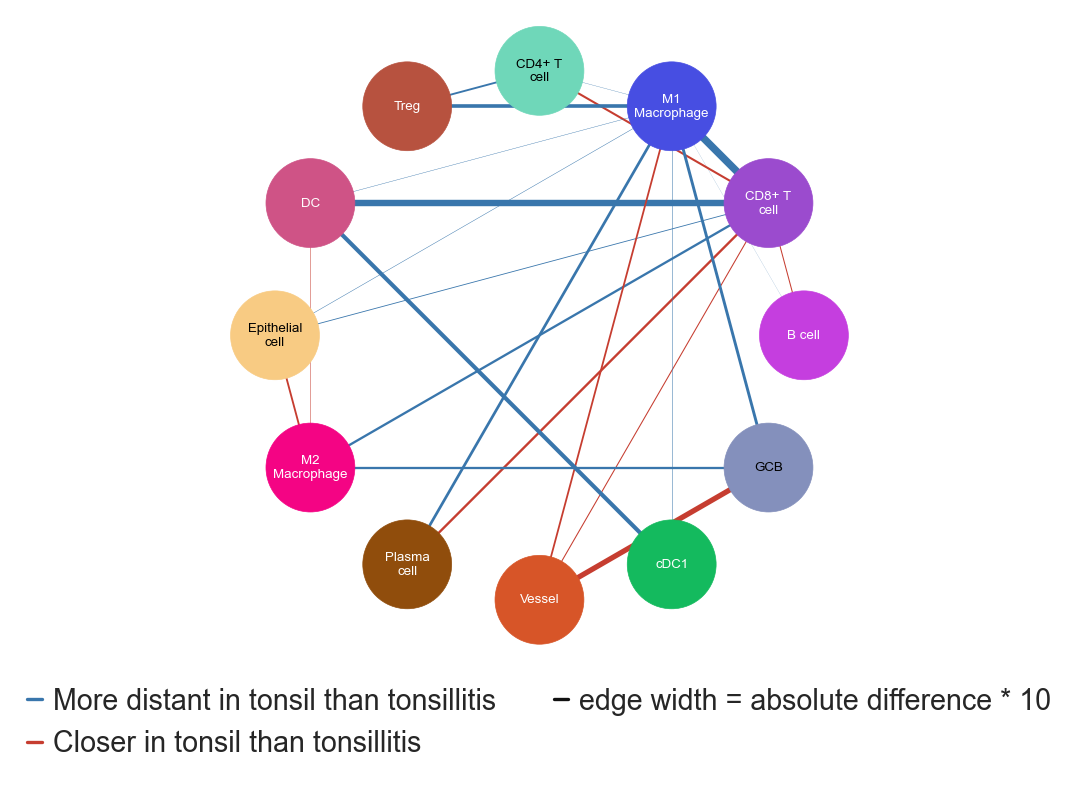

In [13]:
sp.pl.distance_graph(dist_table = dist_data_filt, # the (filtered) distance data table you want to plot 
                  distance_pvals = distance_pvals, # the full distance data table
                  condition_pair=['tonsil', 'tonsillitis'],
                  node_size=1600, font_size=6,
                  palette=None,
                  dpi = 600,
                  savefig=False,
                  output_fname="",
                  output_dir=output_dir,)